In [25]:
# assignment no: 01
# aim: Data Loading, Storage and File Formats

# title: Analyzing Sales Data from Multiple File Formats

In [26]:
#note 📝 - to learn to form a basic template of the sales.csv data for the exam

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#forming the dataframe from scratch

data = {
    'ID': [101, 253, 555, 789, 544, 123, 365, 963],
    'Salesman': ['Ram', 'Sham', 'Tony', 'Jack', 'Luke', 'Gopal', 'Karan', 'Tina'],
    'Sales': [12000, 10000, 30000, 44000, None, 12433, 9999, 15000],
    'Product_Type': ['Grocery', 'Food', 'Clothing', 'Food', 'Waste', 'Electronics', 'Clothing', 'Grocery'],
    'Sales_Channel': ['Offline', 'Online', 'Online', 'Online', 'Offline', '', '', 'Online'],
    'Address': ['Pune', 'Nagpur', 'Chennai', 'Bangalore', 'Delhi', 'Mumbai', 'Jammu', 'Bhopal'],
    'Date': ['2023-01-12', '2023-02-15', '2023-03-10', '2023-04-05', '2023-05-20', '2023-06-25', '2023-07-19', '2023-08-01'],
    'Units_Sold': [15, 20, 10, 25, 5, 50, 18, None]
}

df = pd.DataFrame(data)

#converting data to csv format
df.to_csv('sales.csv', index=False)
df.to_excel('sales.xlsx', index=False)
df.to_json('sales.json', orient='records')

In [29]:
df_csv = pd.read_csv('sales.csv')
df_excel = pd.read_excel('sales.xlsx')
df_json = pd.read_json('sales.json')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8 non-null      int64  
 1   Salesman       8 non-null      object 
 2   Sales          7 non-null      float64
 3   Product_Type   8 non-null      object 
 4   Sales_Channel  8 non-null      object 
 5   Address        8 non-null      object 
 6   Date           8 non-null      object 
 7   Units_Sold     7 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 640.0+ bytes


In [31]:
df.head(10)

,ID,Salesman,Sales,Product_Type,Sales_Channel,Address,Date,Units_Sold
0,101,Ram,12000.0,Grocery,Offline,Pune,2023-01-12,15.0
1,253,Sham,10000.0,Food,Online,Nagpur,2023-02-15,20.0
2,555,Tony,30000.0,Clothing,Online,Chennai,2023-03-10,10.0
3,789,Jack,44000.0,Food,Online,Bangalore,2023-04-05,25.0
4,544,Luke,NaN,Waste,Offline,Delhi,2023-05-20,5.0
5,123,Gopal,12433.0,Electronics,,Mumbai,2023-06-25,50.0
6,365,Karan,9999.0,Clothing,,Jammu,2023-07-19,18.0
7,963,Tina,15000.0,Grocery,Online,Bhopal,2023-08-01,NaN


In [32]:
#checkign for missing values
df.isnull().sum()

ID               0
Salesman         0
Sales            1
Product_Type     0
Sales_Channel    0
Address          0
Date             0
Units_Sold       1
dtype: int64

In [33]:
#replacing empty strings wiht NaN in sales_channel column
df['Sales_Channel'].replace('', np.nan, inplace=True)

In [34]:
df.isnull().sum()

ID               0
Salesman         0
Sales            1
Product_Type     0
Sales_Channel    2
Address          0
Date             0
Units_Sold       1
dtype: int64

In [35]:
#filling the null values using fillna()
df.fillna({
    'Sales' : df['Sales'].mean(),
    'Sales_Channel': 'Unknown',
    'Units_Sold': df['Units_Sold'].median()
}, inplace=True)

In [36]:
df.head(10)

,ID,Salesman,Sales,Product_Type,Sales_Channel,Address,Date,Units_Sold
0,101,Ram,12000.000000,Grocery,Offline,Pune,2023-01-12,15.0
1,253,Sham,10000.000000,Food,Online,Nagpur,2023-02-15,20.0
2,555,Tony,30000.000000,Clothing,Online,Chennai,2023-03-10,10.0
3,789,Jack,44000.000000,Food,Online,Bangalore,2023-04-05,25.0
4,544,Luke,19061.714286,Waste,Offline,Delhi,2023-05-20,5.0
5,123,Gopal,12433.000000,Electronics,Unknown,Mumbai,2023-06-25,50.0
6,365,Karan,9999.000000,Clothing,Unknown,Jammu,2023-07-19,18.0
7,963,Tina,15000.000000,Grocery,Online,Bhopal,2023-08-01,18.0


In [37]:
#Data Transformation
##adding an extra column for sales per unit distribution

df['Sales_Per_Unit'] = df['Sales'] / df['Units_Sold']

In [38]:
df.head()

,ID,Salesman,Sales,Product_Type,Sales_Channel,Address,Date,Units_Sold,Sales_Per_Unit
0,101,Ram,12000.000000,Grocery,Offline,Pune,2023-01-12,15.0,800.000000
1,253,Sham,10000.000000,Food,Online,Nagpur,2023-02-15,20.0,500.000000
2,555,Tony,30000.000000,Clothing,Online,Chennai,2023-03-10,10.0,3000.000000
3,789,Jack,44000.000000,Food,Online,Bangalore,2023-04-05,25.0,1760.000000
4,544,Luke,19061.714286,Waste,Offline,Delhi,2023-05-20,5.0,3812.342857


In [39]:
total_sales = df['Sales'].sum()

print('Total sales : ', total_sales)

Total sales :  152493.7142857143


### Data Viz

In [40]:
# Grouping data by Product_Type and Sales_Channel to get total Sales
sales_by_product_channel = df.groupby(['Product_Type', 'Sales_Channel'])['Sales'].sum().reset_index()

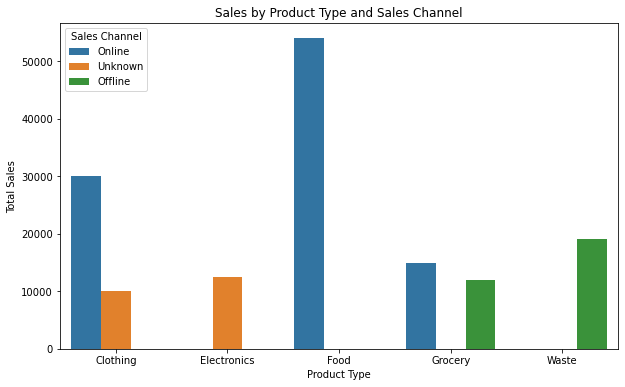

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data = sales_by_product_channel, x='Product_Type', y= 'Sales', hue='Sales_Channel')
plt.title('Sales by Product Type and Sales Channel')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.legend(title='Sales Channel')
plt.show()

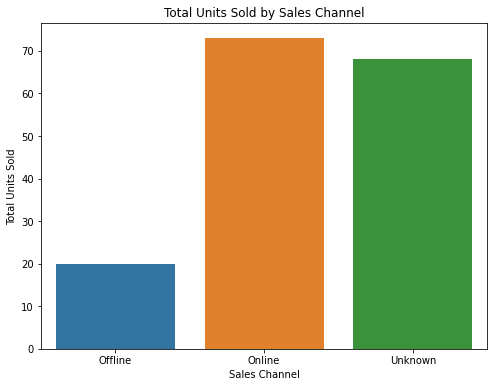

In [42]:
#Untis sold by sales channel
units_by_channel = df.groupby('Sales_Channel')['Units_Sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=units_by_channel, x='Sales_Channel', y='Units_Sold')
plt.title('Total Units Sold by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Units Sold')
plt.show()

Product Distrib : Grocery        2
Food           2
Clothing       2
Waste          1
Electronics    1
Name: Product_Type, dtype: int64


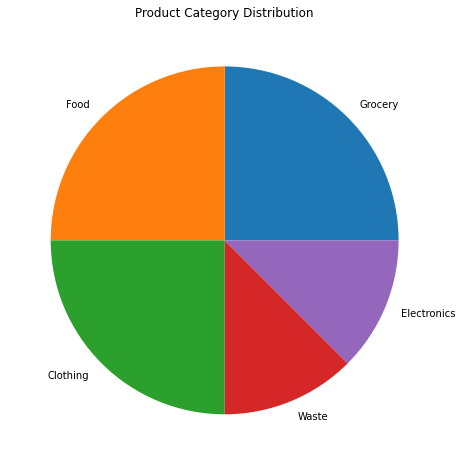

In [43]:
product_distribution = df['Product_Type'].value_counts()
print(f'Product Distrib : {product_distribution}')

#Pie chart - product category distribution 
plt.figure(figsize=(8, 8))
plt.pie(product_distribution, labels=product_distribution.index)
plt.title('Product Category Distribution')
plt.show()